## Date Functionality in Pandas

* Timestamp

In [57]:
import pandas as pd
import numpy as np

In [58]:
pd.Timestamp("8/29/2020 09:32AM")

Timestamp('2020-08-29 09:32:00')

* Period

In [59]:
pd.Period("8/2020")

Period('2020-08', 'M')

In [60]:
pd.Period("8/29/2020")

Period('2020-08-29', 'D')

* DatetimeIndex

In [61]:
t1 = pd.Series(list("abc"),[pd.Timestamp("2020-8-29"), pd.Timestamp("2020-08-30"), pd.Timestamp("2020-08-31")])
t1

2020-08-29    a
2020-08-30    b
2020-08-31    c
dtype: object

In [62]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

* PeriodIndex

In [63]:
t2 = pd.Series(list("def"), [pd.Period("2020-08"), pd.Period("2020-09"), pd.Period("2020-10")])
t2

2020-08    d
2020-09    e
2020-10    f
Freq: M, dtype: object

In [64]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

## Converting to Datetime

In [66]:
d1 = ["2 June 2020", "Aug 29, 2020", "2020-08-03", "6/3/20"]
ts3 = pd.DataFrame(np.random.randint(10, 100, (4, 2)), index = d1, columns = list("ab"))
ts3

,a,b
2 June 2020,40,89
"Aug 29, 2020",20,25
2020-08-03,75,69
6/3/20,23,26


In [67]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2020-06-02,40,89
2020-08-29,20,25
2020-08-03,75,69
2020-06-03,23,26


In [68]:
pd.to_datetime("5.12.20", dayfirst = True)

Timestamp('2020-12-05 00:00:00')

* Timedeltas

In [71]:
pd.Timestamp("9/13/2019")-pd.Timestamp("9/2/2019")

Timedelta('11 days 00:00:00')

In [72]:
pd.Timestamp("9/2/2016 8:10AM") + pd.Timedelta("12D 3H")

Timestamp('2016-09-14 11:10:00')

## Working with Dates in a Dataframe

In [74]:
dates = pd.date_range("10-01-2020", periods = 9, freq = "2W-SUN")
dates

DatetimeIndex(['2020-10-04', '2020-10-18', '2020-11-01', '2020-11-15',
               '2020-11-29', '2020-12-13', '2020-12-27', '2021-01-10',
               '2021-01-24'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [75]:
df = pd.DataFrame({"Count 1" : 100 + np.random.randint(-5, 10, 9).cumsum(),
                   "Count 2" : 120 + np.random.randint(-5, 10, 9)},
                 index = dates)
df

,Count 1,Count 2
2020-10-04,100,127
2020-10-18,106,118
2020-11-01,102,126
2020-11-15,103,120
2020-11-29,101,124
2020-12-13,100,122
2020-12-27,101,125
2021-01-10,101,125
2021-01-24,102,123


In [78]:
df.index.weekday_name

AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'

In [79]:
df.diff()

,Count 1,Count 2
2020-10-04,NaN,NaN
2020-10-18,6.0,-9.0
2020-11-01,-4.0,8.0
2020-11-15,1.0,-6.0
2020-11-29,-2.0,4.0
2020-12-13,-1.0,-2.0
2020-12-27,1.0,3.0
2021-01-10,0.0,0.0
2021-01-24,1.0,-2.0


In [80]:
df.resample("M").mean()

,Count 1,Count 2
2020-10-31,103.0,122.500000
2020-11-30,102.0,123.333333
2020-12-31,100.5,123.500000
2021-01-31,101.5,124.000000


In [82]:
df["2020"]

,Count 1,Count 2
2020-10-04,100,127
2020-10-18,106,118
2020-11-01,102,126
2020-11-15,103,120
2020-11-29,101,124
2020-12-13,100,122
2020-12-27,101,125


In [83]:
df["2020-10"]

,Count 1,Count 2
2020-10-04,100,127
2020-10-18,106,118


In [84]:
df["2020-10":]

,Count 1,Count 2
2020-10-04,100,127
2020-10-18,106,118
2020-11-01,102,126
2020-11-15,103,120
2020-11-29,101,124
2020-12-13,100,122
2020-12-27,101,125
2021-01-10,101,125
2021-01-24,102,123


In [86]:
df.asfreq("W", method = "ffill")

,Count 1,Count 2
2020-10-04,100,127
2020-10-11,100,127
2020-10-18,106,118
2020-10-25,106,118
2020-11-01,102,126
2020-11-08,102,126
2020-11-15,103,120
2020-11-22,103,120
2020-11-29,101,124
2020-12-06,101,124


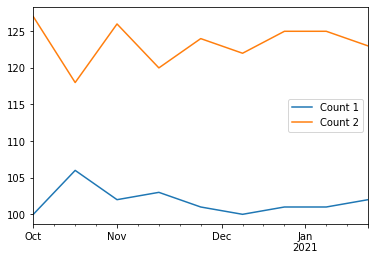

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()